In [62]:
pd.set_option('display.max_rows', 1000)

from transformers import AutoTokenizer
from datasets import load_dataset
import tiktoken
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tokenizers = {}

tokenizer_names = [
    "bigcode/santacoder",
    "bigcode/starcoder",
    #"Salesforce/codegen25-7b-multi",
    "Salesforce/codegen-16B-mono",
    "adept/persimmon-8b-base",
    "codellama/CodeLlama-7b-hf",
    "lvwerra/starcoder-6k",
    "lvwerra/starcoder-12k",
    "lvwerra/starcoder-24k",
    "lvwerra/starcoder-98k",
    "lvwerra/starcoder-196k",
    "lvwerra/starcoder-393k"
]

for name in tokenizer_names:
    if "starcoder" not in name:
        tokenizers[name.split("/")[1].split("-")[0]] = AutoTokenizer.from_pretrained(name, use_auth_token=True, trust_remote_code=True, use_fast=True)
    else:
        tokenizers[name.split("/")[1]] = AutoTokenizer.from_pretrained(name, use_auth_token=True, trust_remote_code=True, use_fast=True)

/Users/leandro/git/sandbox/env/lib/python3.9/site-packages/transformers/models/auto/tokenization_auto.py:648: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
Loading the tokenizer from the `special_tokens_map.json` and the `added_tokens.json` will be removed in `transformers 5`,  it is kept for forward compatibility, but it is recommended to update your `tokenizer_config.json` by uploading it again. You will see the new `added_tokens_decoder` attribute that will store the relevant information.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `leg

In [3]:
ds = load_dataset("bigcode/the-stack-march-sample-special-tokens-stripped", split="train")

Found cached dataset parquet (/Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


In [4]:
ds = ds.shuffle(seed=42)

Loading cached shuffled indices for dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-f5b618eb4d704358.arrow


In [5]:
ds_sample = ds.select(range(100_000))

In [6]:
ds_sample

Dataset({
    features: ['content'],
    num_rows: 100000
})

In [7]:
total_chars = sum([len(sample["content"]) for sample in ds_sample])

In [8]:
def num_tokens(examples, tokenizer_name=None):
    tokens = tokenizers[tokenizer_name](examples["content"]).input_ids
    lenghts = [len(t) for t in tokens]
    return {tokenizer_name: lenghts}

In [9]:
for name in tokenizers:
    print(name)
    ds_sample = ds_sample.map(num_tokens, num_proc=8, batched=True, batch_size=1000, fn_kwargs={"tokenizer_name": name})

santacoder


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-a5b1be18d07e484f_*_of_00008.arrow


starcoder


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-b171febca9097d3b_*_of_00008.arrow


codegen


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-0ca7309352fed67b_*_of_00008.arrow


persimmon


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-15a69b5d2ad219e9_*_of_00008.arrow


CodeLlama


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-2062330cfa1b88d2_*_of_00008.arrow


starcoder-6k


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-9acc55235fb93899_*_of_00008.arrow


starcoder-12k


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-61e2120e7fc1316b_*_of_00008.arrow


starcoder-24k


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-8ba467e258d8db89_*_of_00008.arrow


starcoder-98k


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-a89609ba956a7a83_*_of_00008.arrow


starcoder-196k


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-71183f510556488f_*_of_00008.arrow


starcoder-393k


Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-b9aa550a8436d2c3_*_of_00008.arrow


In [10]:
for name in tokenizers:
    print(f"{name}:\t{(total_chars/sum(ds_sample[name])):.2f}")

santacoder:	3.21
starcoder:	3.27
codegen:	3.10
persimmon:	2.96
CodeLlama:	2.81
starcoder-6k:	2.75
starcoder-12k:	2.98
starcoder-24k:	3.15
starcoder-98k:	3.36
starcoder-196k:	3.43
starcoder-393k:	3.48


In [11]:
tokenizers["gpt4"] = tiktoken.get_encoding("cl100k_base")
tokenizers["codex/text-davinci"] = tiktoken.get_encoding("p50k_base")
tokenizers["gpt-2/3"] = tiktoken.get_encoding("r50k_base")

openai_names = ["gpt4", "codex/text-davinci", "gpt-2/3"]

In [12]:
def num_tokens_tt(examples, tokenizer_name=None):
    tokens = tokenizers[tokenizer_name].encode_batch(examples["content"])
    lenghts = [len(t) for t in tokens]
    return {f"{tokenizer_name}": lenghts}

In [13]:
for name in openai_names:
    ds_sample = ds_sample.map(num_tokens_tt, num_proc=1, batched=True, batch_size=1000, fn_kwargs={"tokenizer_name": name})

Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-4b1d0fdecb4de7d9.arrow
Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-b105a242d2d0f36c.arrow
Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-3c04cb20c5e61723.arrow


In [14]:
data = []
for name in tokenizers:
    ratio = total_chars/sum(ds_sample[name])
    if name not in openai_names:
        vocab_size = tokenizers[name].vocab_size
    else:
        vocab_size = tokenizers[name].n_vocab
    data.append({
        "tokenizer": name,
        "character/token": ratio,
        "vocab_size": vocab_size,
    }
    )

In [15]:
element = data.pop(1)
data.insert(7, element)

In [16]:
df_results = pd.DataFrame.from_records(data)

In [17]:
df_results

,tokenizer,character/token,vocab_size
0,santacoder,3.212626,49152
1,codegen,3.096418,50257
2,persimmon,2.958010,262144
3,CodeLlama,2.810960,32016
4,starcoder-6k,2.752220,6144
5,starcoder-12k,2.976113,12288
6,starcoder-24k,3.146136,24576
7,starcoder,3.270098,49152
8,starcoder-98k,3.361067,98304
9,starcoder-196k,3.430138,196608


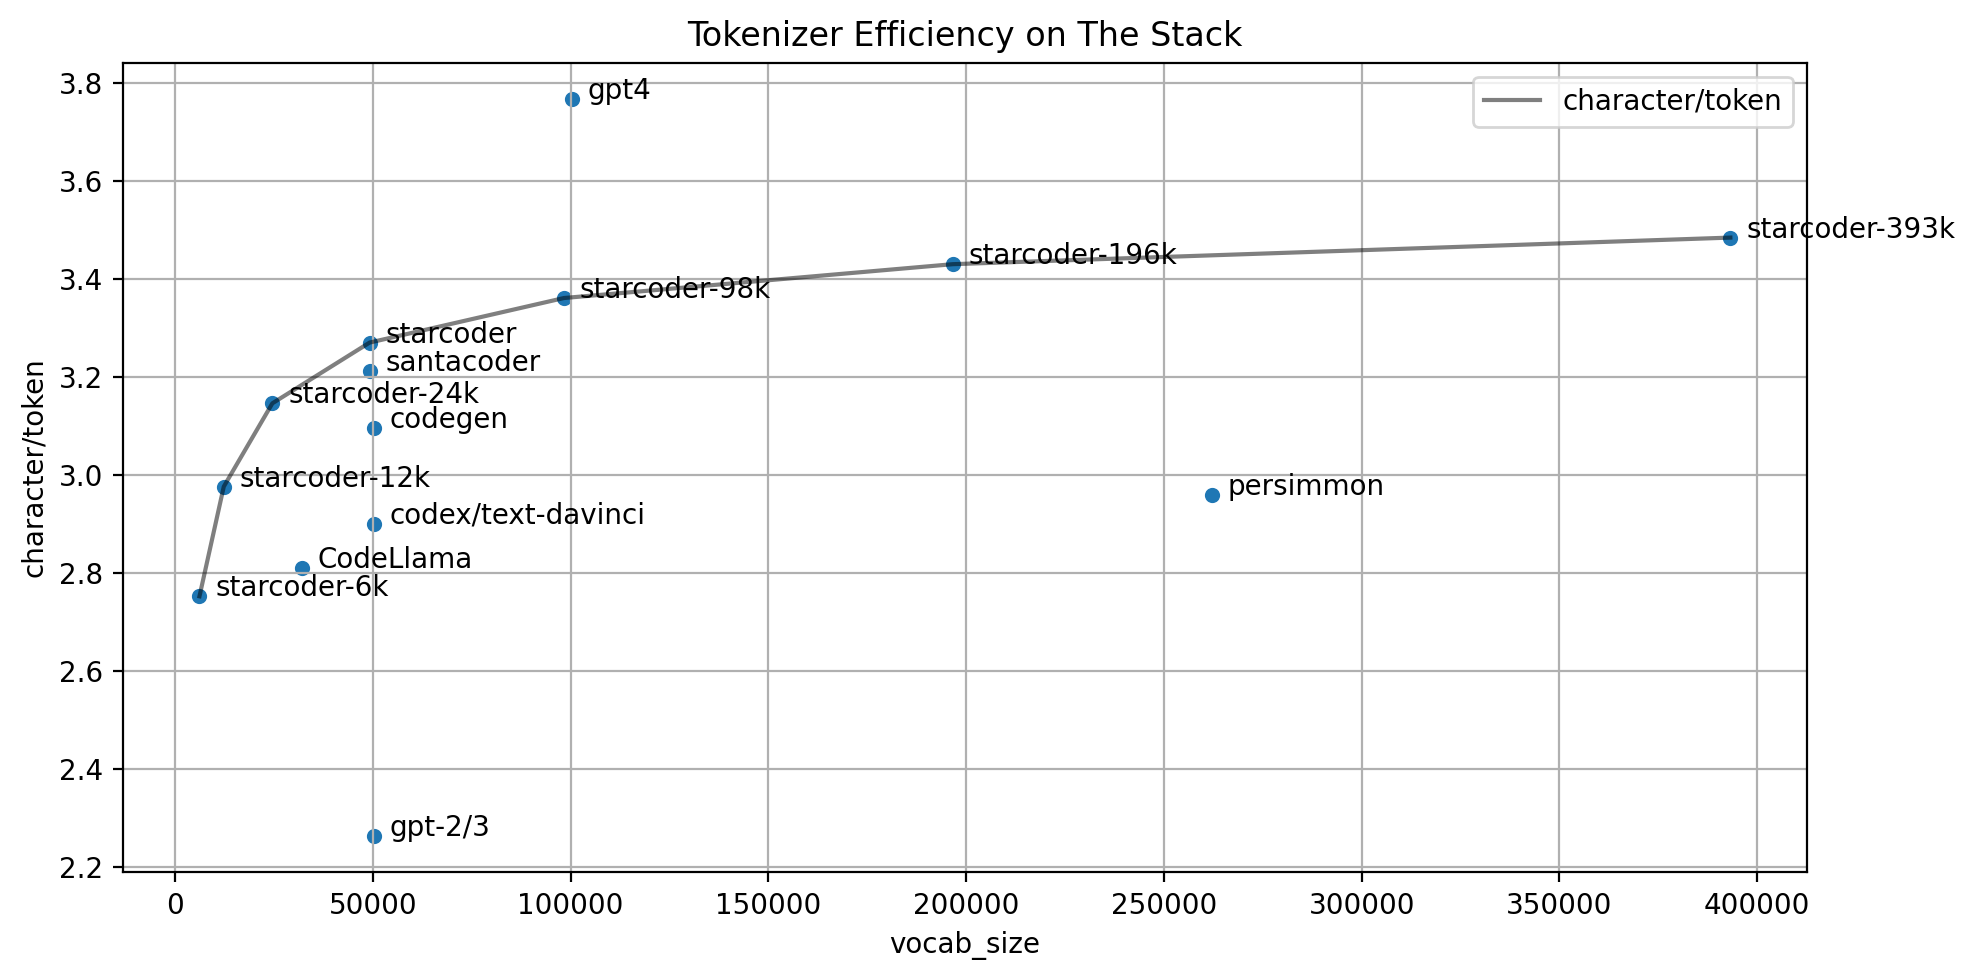

In [18]:
#create scatter plot of assists vs. points
fig, ax = plt.subplots(dpi=200, figsize=(10,5))
ax = df_results.plot(kind='scatter', x='vocab_size', y='character/token', ax=ax)

ax = df_results.loc[df_results["tokenizer"].str.contains("starcoder")].plot(kind='line', x='vocab_size', y='character/token', ax=ax, color="black", alpha=0.5)


#label each point in scatter plot
for idx, row in df_results.iterrows():
    ax.annotate(row['tokenizer'], (row['vocab_size']+4000, row['character/token']))

plt.title("Tokenizer Efficiency on The Stack")
plt.tight_layout()
plt.grid()

In [25]:
ds_r = ds_sample.map(lambda x: {"r": x["starcoder-98k"]/x["gpt4"]})

Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-aef6db386770d41e.arrow


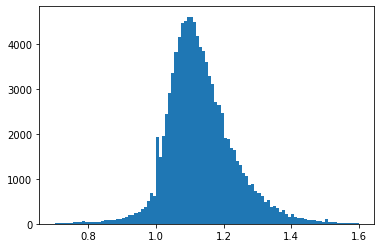

In [26]:
_=plt.hist(ds_r["r"], bins=np.linspace(0.7, 1.6, 100))

In [22]:
ds_r = ds_r.filter(lambda x: x["r"] > 1.2)

Loading cached processed dataset at /Users/leandro/.cache/huggingface/datasets/bigcode___parquet/bigcode--the-stack-march-sample-special-tokens-stripped-3760e25b4a77f7e2/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7/cache-a38e58a39ed4af34.arrow


In [23]:
ds_r[0]

{'content': '// const jsonRpc = require(\'../../lib\').v2();\n\n// describe(\'JSONRPC_V2 (lib/jsonrpc-v2.js)\', () => {\n//   it(\'should be true\', () => {\n//     console.log(jsonRpc.request(true, [true, false], 1));\n//   });\n// });\n"use strict";',
 'santacoder': 81,
 'starcoder': 81,
 'codegen': 88,
 'persimmon': 82,
 'CodeLlama': 89,
 'starcoder-6k': 89,
 'starcoder-12k': 83,
 'starcoder-24k': 82,
 'starcoder-98k': 81,
 'starcoder-196k': 81,
 'starcoder-393k': 80,
 'gpt4': 66,
 'codex/text-davinci': 88,
 'gpt-2/3': 93,
 'r': 1.2272727272727273}

In [43]:
starcoder_tokens = [tokenizers["starcoder-98k"].convert_tokens_to_string([i]) for i in tokenizers["starcoder-98k"].tokenize(ds_r[0]["content"])]
gpt4_tokens = [tokenizers["gpt4"].decode([x]) for x in tokenizers["gpt4"].encode(ds_r[0]["content"])]

In [55]:
gpt4_tokens_pad = gpt4_tokens+["END"]*(len(starcoder_tokens)-len(gpt4_tokens))

In [61]:
pd.DataFrame({"starcoder": [str(repr(t)) for t in starcoder_tokens], "gpt4": [str(repr(t)) for t in gpt4_tokens_pad]})

,starcoder,gpt4
0,'//','//'
1,' const',' const'
2,' json',' json'
3,'Rpc','Rpc'
4,' =',' ='
5,' require',' require'
6,"""('../../""","""('../../"""
7,'lib','lib'
8,"""').""","""')."""
9,'v','v'
